### Importing Libraries

In [601]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [602]:
#reading dataset
data = pd.read_csv('parkinsons.csv')

In [603]:
data.head()

,Unnamed: 0,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [604]:
#checking length of dataset
len(data)

195

In [605]:
8#checking columns
data.columns

Index(['Unnamed: 0', 'name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [606]:
#checking datatypes of columns
data.dtypes

Unnamed: 0            int64
name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [607]:
#dropping name column which is not useful
data.drop(['name', 'Unnamed: 0'], inplace=True, axis=1)

In [608]:
#checking unique values of status column which will be predicted value
data['status'].unique()

array([1, 0])

In [609]:
#checking NAN values
data.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

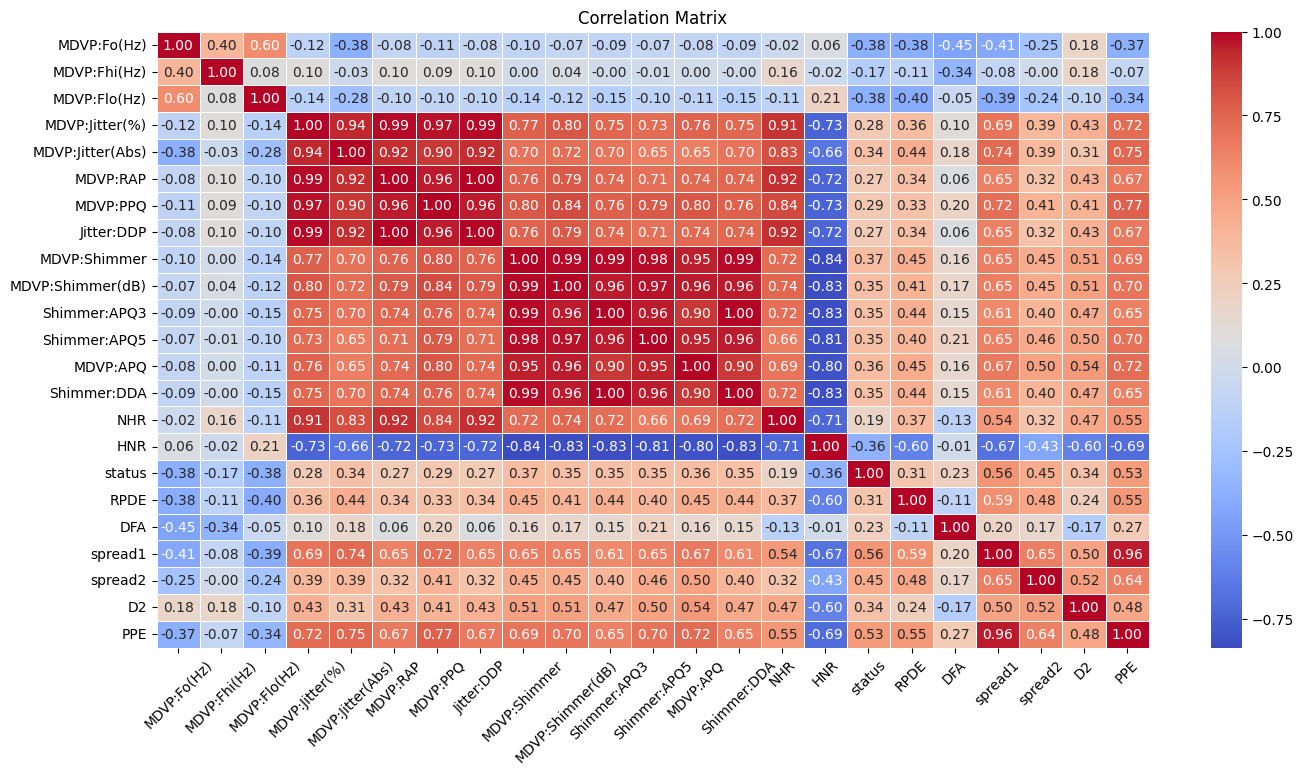

In [610]:
#checking correlation between columns for data multicollinearity
corr_matrix = data.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [611]:
# assigning input and target columns
X = data.drop('status', axis=1)
y = data['status']

### As the dataset is not a big one, only 10% of dataset will be taken for testing

In [612]:
# creating training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [613]:
# standardization of X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building MLP model

In [614]:
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [615]:
# checking the MLP structure
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 256)               5888      
                                                                 
 dropout_72 (Dropout)        (None, 256)               0         
                                                                 
 dense_163 (Dense)           (None, 128)               32896     
                                                                 
 dropout_73 (Dropout)        (None, 128)               0         
                                                                 
 dense_164 (Dense)           (None, 64)                8256      
                                                                 
 dropout_74 (Dropout)        (None, 64)                0         
                                                                 
 dense_165 (Dense)           (None, 32)              

In [616]:
# adding hyper-parameters of the model
model.compile(
    optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy']
)

In [617]:
# adding callback (earlystopping) to the model to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [618]:
# fitting the model to the dataset
history = model.fit(
    X_train, y_train,
    validation_split=0.1,  # 10% of the training data will be used for validation
    epochs=100,
    batch_size=1,
    callbacks=[early_stopping]
)

Epoch 1/100
157/157 [==============================] - 2s 5ms/step - loss: 0.5874 - accuracy: 0.6943 - val_loss: 0.3621 - val_accuracy: 0.7778
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4276 - accuracy: 0.8025 - val_loss: 0.2776 - val_accuracy: 0.7778
Epoch 3/100
157/157 [==============================] - 1s 7ms/step - loss: 0.3851 - accuracy: 0.7834 - val_loss: 0.2511 - val_accuracy: 0.7778
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 0.3556 - accuracy: 0.8471 - val_loss: 0.3315 - val_accuracy: 0.7778
Epoch 5/100
157/157 [==============================] - 2s 14ms/step - loss: 0.3502 - accuracy: 0.8217 - val_loss: 0.1962 - val_accuracy: 0.9444
Epoch 6/100
157/157 [==============================] - 2s 12ms/step - loss: 0.3178 - accuracy: 0.8662 - val_loss: 0.1562 - val_accuracy: 1.0000
Epoch 7/100
157/157 [==============================] - 1s 8ms/step - loss: 0.2588 - accuracy: 0.8662 - val_loss: 0.1726 - val_accuracy: 0.9

In [619]:
# checking the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 163ms/step - loss: 0.4974 - accuracy: 0.9000


In [620]:
print('The loss of the test data: ', loss)
print('The accuracy of the test data: ', accuracy)

The loss of the test data:  0.4974154829978943
The accuracy of the test data:  0.8999999761581421
